## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

Análisis Exploratorio de Datos

In [2]:
# Se importan las bibliotecas necesarias
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
"""
nltk.download('stopwords'): Esta línea de código invoca la función download() de NLTK y pasa como argumento la
cadena 'stopwords'. Esto indica que queremos descargar el conjunto de palabras de parada en inglés.

Cuando se ejecuta este código, NLTK busca el conjunto de palabras de parada correspondiente en inglés y lo
descarga en nuestro sistema. Este conjunto incluye palabras como "the", "is", "at", "which", etc.

Después de descargar las palabras de parada, se utiliza en nuestro código para filtrarlas en nuestro
análisis de texto y mejorar la calidad del procesamiento de lenguaje natural (NLP).

"""
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juancristiano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Se carga el dataset
df = pd.read_csv('C:/Users/juancristiano/Documents/Repositorio/googleplaystore_user_reviews.csv')


In [5]:
"""
Cuando se ejecuta df.head(), el DataFrame df se imprime en la consola o en la salida del código,
mostrando las primeras filas de datos. Esto es útil para obtener una vista previa rápida de los
datos y verificar que se hayan cargado correctamente antes de realizar cualquier manipulación
o análisis adicional.

"""
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
"""
El método info() de un DataFrame en pandas proporciona información detallada sobre el DataFrame, incluyendo:

El índice: Muestra el rango de índices del DataFrame.
El número de columnas: Indica cuántas columnas hay en el DataFrame.
El nombre de las columnas: Lista los nombres de todas las columnas.
El número de valores no nulos en cada columna: Muestra cuántos valores no nulos hay en cada columna.
Esto puede ayudarte a identificar columnas con valores faltantes (NaN).
El tipo de datos de cada columna: Muestra el tipo de datos (por ejemplo, int, float, object) de cada columna.

"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [7]:
"""
df['Sentiment'].value_counts(): se utiliza en Pandas, para contar las ocurrencias de cada valor único en la columna 'Sentiment'
de el DataFrame df.

df: Esto se refiere al DataFrame que hemos creado y que contiene nuestros datos.

['Sentiment']: Este es el nombre de la columna en el DataFrame que queremos analizar.

.value_counts(): Este es un método de la serie en pandas que cuenta las ocurrencias únicas de cada valor en la serie.
Devuelve una serie que contiene los conteos de cada valor único en orden descendente.

Por lo tanto, df['Sentiment'].value_counts() devuelve una serie que contiene el recuento de cada valor único en la
columna 'Sentiment'. Esto es útil para comprender la distribución de las etiquetas de sentimiento en nuestros datos
y nos proporciona una idea de cuántas instancias hay para cada categoría de sentimiento (por ejemplo, positivo, negativo, neutral).

"""
df['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64

In [8]:
"""
Este código en Python se encarga de filtrar el DataFrame df para eliminar las filas que tengan
el valor 'Neutral' en la columna 'Sentiment'.

df['Sentiment'] != 'Neutral': Esta expresión crea una Serie booleana que tiene el valor True para cada fila
donde el valor en la columna 'Sentiment' no es igual a 'Neutral', y False en caso contrario.

df[df['Sentiment'] != 'Neutral']: Esta expresión filtra el DataFrame df usando la Serie booleana creada anteriormente.
Devuelve un nuevo DataFrame que contiene solo las filas donde el valor en la columna 'Sentiment' no es 'Neutral'.

df_1 = df[df['Sentiment'] != 'Neutral']: Finalmente, asignamos el nuevo DataFrame resultante a la variable df_1.

En resumen, el código elimina todas las filas del DataFrame original donde el sentimiento sea 'Neutral', y guarda
el resultado en un nuevo DataFrame llamado df_1. Esto nos permite trabajar solo con las reseñas que tienen sentimientos
positivos o negativos.

"""
df_1 = df[df['Sentiment'] != 'Neutral']

Limpieza de datos

In [10]:
"""
Este código se encarga de equilibrar el conjunto de datos tomando un número igual de muestras para las clases
'Positive' y 'Negative'.

positive_reviews = df_1[df_1['Sentiment'] == 'Positive']: Esta línea filtra el DataFrame df_1 (el cual ya ha sido
filtrado para eliminar las reseñas con sentimiento neutral) para seleccionar solo las filas donde el valor en la
columna 'Sentiment' es 'Positive'. Esto crea un nuevo DataFrame llamado positive_reviews que contiene solo las
reseñas con sentimiento positivo.

negative_reviews = df_1[df_1['Sentiment'] == 'Negative']: Similarmente, esta línea filtra el DataFrame df_1 para
seleccionar solo las filas donde el valor en la columna 'Sentiment' es 'Negative', creando un nuevo DataFrame llamado
negative_reviews que contiene solo las reseñas con sentimiento negativo.

num_samples = min(len(positive_reviews), len(negative_reviews)): Esta línea calcula el número mínimo de muestras entre
las clases positivas y negativas. Esto asegura que tendremos el mismo número de muestras para cada
clase en el conjunto de datos equilibrado.

balanced_df = pd.concat([positive_reviews.sample(num_samples, random_state=88), negative_reviews.sample(num_samples,
random_state=88)]): Finalmente, esta línea crea un nuevo DataFrame llamado balanced_df concatenando aleatoriamente
un número igual de muestras de reseñas positivas y negativas. Se utiliza el método sample para seleccionar
aleatoriamente un número específico de muestras de cada DataFrame de reseñas positivas y negativas, y se utiliza
el argumento random_state para garantizar reproducibilidad en la selección aleatoria.

En resumen, este código asegura que tengamos un conjunto de datos equilibrado con un número igual de muestras
para las clases 'Positive' y 'Negative', lo cual puede ser importante para entrenar modelos de aprendizaje automático
y evitar sesgos hacia una clase particular.

"""
positive_reviews = df_1[df_1['Sentiment'] == 'Positive']
negative_reviews = df_1[df_1['Sentiment'] == 'Negative']
num_samples = min(len(positive_reviews), len(negative_reviews))
balanced_df = pd.concat([positive_reviews.sample(num_samples, random_state=88), negative_reviews.sample(num_samples, random_state=88)])

In [11]:
"""
Aquí se define una función llamada preprocess_text que se utiliza para preprocesar texto, especialmente útil en tareas
de procesamiento de lenguaje natural (NLP).

def preprocess_text(Translated_Review):: Esta línea define una función llamada preprocess_text que toma un argumento llamado
Translated_Review, que es una cadena de texto que representa una revisión traducida.

Translated_Review = re.sub(r'http\S+', '', str(Translated_Review)): Esta línea utiliza la función re.sub() del módulo re
para eliminar cualquier URL en el texto. La expresión regular r'http\S+' encuentra cualquier secuencia de caracteres que
comience con "http" seguido de uno o más caracteres que no son espacios en blanco (\S+). La cadena vacía '' reemplaza
las URL encontradas, lo que efectivamente las elimina del texto.

Translated_Review = re.sub(r'\d+', '', Translated_Review): Esta línea utiliza la función re.sub() nuevamente para eliminar
los números del texto. La expresión regular \d+ encuentra cualquier secuencia de uno o más dígitos. Al reemplazarlos con
una cadena vacía '', se eliminan todos los números del texto.

stop_words = set(stopwords.words('english')): Aquí se carga un conjunto de palabras vacías (stopwords) del idioma inglés
utilizando la función stopwords.words('english') de la biblioteca NLTK. Las palabras vacías son palabras comunes que no
aportan mucho significado al texto, como "a", "the", "is", etc.

words = Translated_Review.split(): Esta línea divide el texto preprocesado en palabras individuales y crea una lista
de estas palabras.

filtered_words = [word for word in words if word not in stop_words]: Aquí se realiza una filtración de palabras, donde se
seleccionan solo aquellas palabras que no están en el conjunto de palabras vacías. Esto se hace utilizando una comprensión
de lista que itera sobre todas las palabras en el texto y selecciona solo aquellas que no están en stop_words.

return ' '.join(filtered_words): Finalmente, todas las palabras filtradas se concatenan nuevamente en una sola cadena
utilizando el método join() con un espacio como separador, y esta cadena se devuelve como resultado de la función.

En resumen, esta función preprocess_text toma una revisión traducida, elimina las URLs y los números, y luego elimina
las palabras vacías del texto antes de devolver el texto preprocesado.

"""
def preprocess_text(Translated_Review):
    # Quitar URL
    Translated_Review = re.sub(r'http\S+', '', str(Translated_Review))
    # Quitar números
    Translated_Review = re.sub(r'\d+', '', Translated_Review)
    stop_words = set(stopwords.words('english'))
    words = Translated_Review.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [12]:
"""
Este código realiza lo siguiente:

balanced_df['Translated_Review']: Accede a la columna 'Translated_Review' del DataFrame balanced_df, que contiene las reseñas traducidas.

.apply(preprocess_text): Utiliza el método apply para aplicar la función de preprocesamiento preprocess_text a cada elemento de la
columna 'Translated_Review'. Esto significa que la función preprocess_text se aplicará individualmente a cada revisión traducida
en la columna.

balanced_df['clean_text']: Crea una nueva columna llamada 'clean_text' en el DataFrame balanced_df, donde se almacenarán las
reseñas preprocesadas.

En resumen, este código toma cada revisión traducida en el DataFrame balanced_df, aplica la función de preprocesamiento
preprocess_text a cada una y almacena los resultados preprocesados en una nueva columna llamada 'clean_text'. Esto es útil
para realizar análisis o modelado posterior con las reseñas preprocesadas.

"""
balanced_df['clean_text'] = balanced_df['Translated_Review'].apply(preprocess_text)

In [13]:
"""
Este código realiza lo siguiente:

balanced_df.dropna(subset=['clean_text', 'Translated_Review'], inplace=True): Utiliza el método dropna() del DataFrame balanced_df
para eliminar filas que contengan valores faltantes (NaN) en las columnas 'clean_text' y 'Translated_Review'. El parámetro subset
especifica las columnas en las que se deben buscar los valores faltantes. Al establecer inplace=True, los cambios se realizan
directamente en el DataFrame balanced_df, en lugar de devolver un nuevo DataFrame con las filas eliminadas.

En resumen, esta línea de código elimina cualquier fila en el DataFrame balanced_df que tenga un valor faltante (NaN) en las
columnas 'clean_text' y 'Translated_Review', asegurando que solo se conserven las filas que contienen texto preprocesado
y su correspondiente revisión traducida. Esto puede ser importante para evitar problemas en el análisis o modelado posterior
que puedan surgir debido a los valores faltantes.

"""
balanced_df.dropna(subset=['clean_text', 'Translated_Review'], inplace=True)

Nubes de palabras

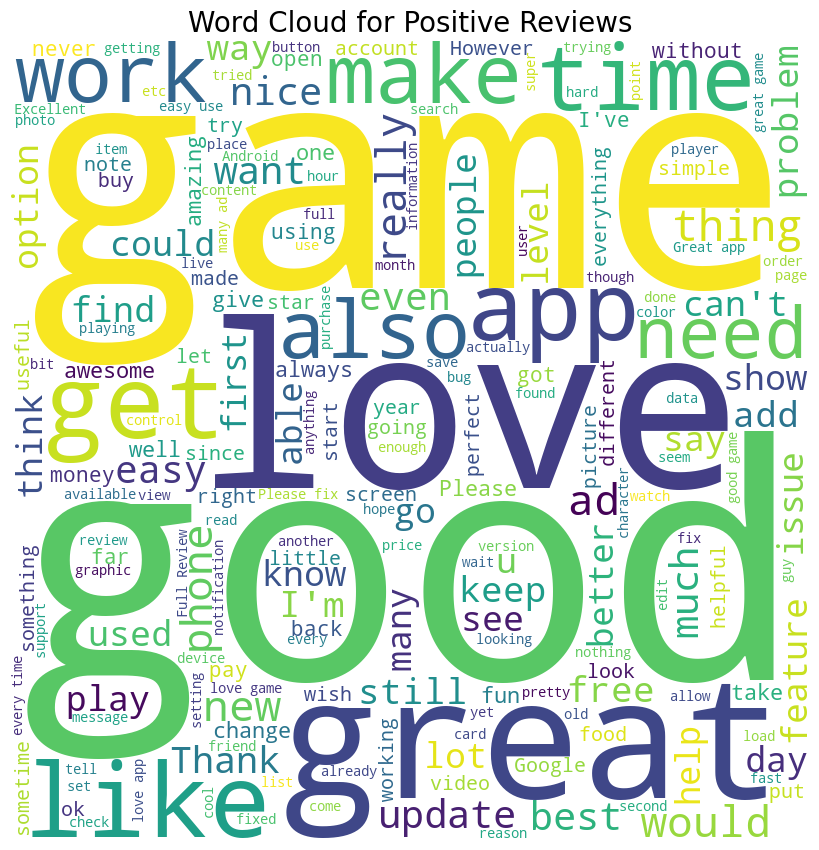

In [14]:
"""
Este código realiza lo siguiente:

positive_text = ' '.join(balanced_df[balanced_df['Sentiment'] == 'Positive']['clean_text']): Concatena todas las reseñas
positivas en una sola cadena de texto. Se seleccionan las reseñas positivas del DataFrame balanced_df mediante la condición
balanced_df['Sentiment'] == 'Positive' y luego se extrae el texto preprocesado de estas reseñas.

positive_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords.words('english'),
min_font_size=10).generate(positive_text): Se crea un objeto WordCloud con ciertas configuraciones. Se especifica el ancho
y la altura de la nube de palabras, el color de fondo, las palabras vacías a excluir (en este caso, las stopwords en inglés),
y el tamaño mínimo de fuente. Se genera la nube de palabras utilizando el texto concatenado de las reseñas positivas.

Se configura la visualización de la nube de palabras utilizando Matplotlib. Se establece el tamaño de la figura, se muestra
la nube de palabras, se eliminan los ejes, se ajusta el diseño, se agrega un título y se muestra la visualización.

En resumen, este código genera una nube de palabras para visualizar las palabras más frecuentes en las reseñas positivas
del DataFrame balanced_df, lo que puede proporcionar una idea rápida de los temas o conceptos más comunes asociados
con las reseñas positivas.

"""
positive_text = ' '.join(balanced_df[balanced_df['Sentiment'] == 'Positive']['clean_text'])
positive_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(positive_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Positive Reviews', fontsize=20)
plt.show()

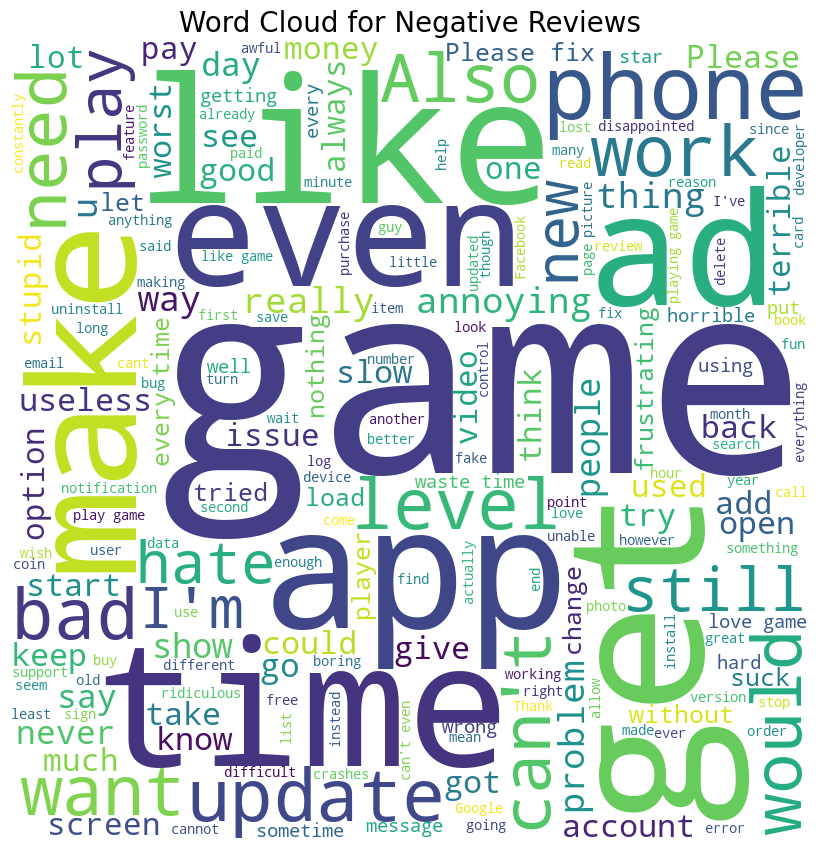

In [15]:
"""
En este código se realiza lo siguiente:

negative_text = ' '.join(balanced_df[balanced_df['Sentiment'] == 'Negative']['clean_text']): Concatena todas las reseñas negativas
en una sola cadena de texto. Se seleccionan las reseñas negativas del DataFrame balanced_df mediante la condición
balanced_df['Sentiment'] == 'Negative' y luego se extrae el texto preprocesado de estas reseñas.

negative_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords.words('english'),
min_font_size=10).generate(negative_text): Se crea un objeto WordCloud con ciertas configuraciones. Se especifica el ancho y la
altura de la nube de palabras, el color de fondo, las palabras vacías a excluir (en este caso, las stopwords en inglés), y el
tamaño mínimo de fuente. Se genera la nube de palabras utilizando el texto concatenado de las reseñas negativas.

Se configura la visualización de la nube de palabras utilizando Matplotlib. Se establece el tamaño de la figura, se muestra
la nube de palabras, se eliminan los ejes, se ajusta el diseño, se agrega un título y se muestra la visualización.

En resumen, este código genera una nube de palabras para visualizar las palabras más frecuentes en las reseñas negativas
del DataFrame balanced_df, lo que puede proporcionar una idea rápida de los temas o conceptos más comunes asociados
con las reseñas negativas.

"""
negative_text = ' '.join(balanced_df[balanced_df['Sentiment'] == 'Negative']['clean_text'])
negative_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(negative_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Negative Reviews', fontsize=20)
plt.show()


Dividir el conjunto de datos en entrenamiento y prueba

In [16]:
"""
X = balanced_df['clean_text']: Selecciona las características (variables independientes) de nuestro conjunto de datos.
En este caso, estamos utilizando la columna 'clean_text' del DataFrame balanced_df, que contiene el texto
preprocesado de las reseñas.

y = balanced_df['Sentiment']: Selecciona las etiquetas (variable dependiente) de nuestro conjunto de datos. En este caso,
estamos utilizando la columna 'Sentiment' del DataFrame balanced_df, que contiene el sentimiento asociado a cada
reseña (positivo o negativo).

train_test_split(X, y, test_size=0.2, random_state=88): Divide los datos en conjuntos de entrenamiento y prueba.
El parámetro test_size=0.2 indica que el 20% de los datos se usarán para pruebas, mientras que el 80% restante
se utilizará para entrenamiento. El parámetro random_state=77 se utiliza para garantizar que la división de datos
sea reproducible, es decir, produce la misma división cada vez que se ejecuta el código con el mismo valor de random_state.
Los conjuntos de características y etiquetas se dividen en X_train (características de entrenamiento),
X_test (características de prueba), y_train (etiquetas de entrenamiento) y y_test (etiquetas de prueba).

En resumen, este código divide nuestro conjunto de datos en conjuntos de características y etiquetas, y luego
divide estos conjuntos en conjuntos de entrenamiento y prueba para su uso en el modelado y evaluación posterior.
La división es importante para evaluar la capacidad de generalización del modelo en datos no vistos.

"""
X = balanced_df['clean_text']
y = balanced_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

Vectorización

In [17]:
"""
tfidf_vectorizer = TfidfVectorizer(max_features=1000): Se crea un objeto TfidfVectorizer que convierte las reseñas de
texto en una representación numérica utilizando el esquema de ponderación TF-IDF (Term Frequency-Inverse Document Frequency).
El parámetro max_features=1000 limita el número de características (términos) a las 1000 más frecuentes en el conjunto de
datos. Esto ayuda a reducir la dimensionalidad de la matriz TF-IDF, lo que puede mejorar el rendimiento del modelo y
reducir el tiempo de entrenamiento.

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train): Se utiliza el método fit_transform() del objeto TfidfVectorizer
para transformar el conjunto de entrenamiento X_train en una matriz TF-IDF. Esto significa que cada revisión de texto
se convierte en un vector numérico que representa la frecuencia de las palabras en esa revisión, ponderadas por la
frecuencia inversa del documento en el conjunto de entrenamiento.

X_test_tfidf = tfidf_vectorizer.transform(X_test): Se utiliza el método transform() del objeto TfidfVectorizer para
transformar el conjunto de prueba X_test en una matriz TF-IDF. Es importante utilizar el mismo vectorizador que se utilizó
para el conjunto de entrenamiento para garantizar que las mismas características se utilicen en ambos conjuntos y que la
representación numérica sea coherente.

En resumen, este código convierte el texto de las reseñas en una representación numérica utilizando TF-IDF, lo que permite
que los algoritmos de aprendizaje automático trabajen con estos datos de texto en lugar de texto en bruto. Esto es esencial
para entrenar modelos de aprendizaje automático en datos de texto.

"""
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Random Forest: Es un clasificador de conjunto que utiliza múltiples árboles de decisión y combina sus predicciones para obtener una predicción final. Es robusto y puede manejar bien datos de alta dimensionalidad como el texto. Es útil para detectar patrones complejos en los datos y es menos propenso al sobreajuste en comparación con un solo árbol de decisión.

La elección del vectorizador (TF-IDF) y el clasificador (Random Forest) se basa en su efectividad y adecuación para el procesamiento de texto y problemas de clasificación de alta dimensionalidad. Estas elecciones se justifican por su capacidad para capturar características importantes del texto y para manejar eficazmente la complejidad del problema de clasificación de las reseñas.

Modelo Random Forest

In [18]:
"""
Este código realiza lo siguiente:

rf_classifier = RandomForestClassifier(random_state=88): Se crea un objeto RandomForestClassifier, que es un clasificador
basado en el algoritmo de bosques aleatorios. Este clasificador se utiliza para entrenar un modelo de clasificación utilizando
árboles de decisión aleatorios. El parámetro random_state=88 se utiliza para inicializar el generador de números aleatorios,
lo que garantiza que los resultados sean reproducibles si se ejecuta el código varias veces.

rf_classifier.fit(X_train_tfidf, y_train): Se utiliza el método fit() del clasificador RandomForestClassifier para entrenar
el modelo utilizando los datos de entrenamiento transformados mediante TF-IDF (X_train_tfidf) y las etiquetas de entrenamiento
(y_train). Durante el entrenamiento, el modelo aprenderá a predecir las etiquetas de las reseñas basándose en las
características TF-IDF de las mismas.

En resumen, este código entrena un modelo de clasificación de bosques aleatorios utilizando los datos de entrenamiento
transformados mediante TF-IDF, lo que permite que el modelo aprenda a clasificar las reseñas de acuerdo con su sentimiento
(positivo o negativo). Una vez entrenado, el modelo estará listo para realizar predicciones sobre nuevos datos de prueba.

"""
rf_classifier = RandomForestClassifier(random_state=88)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=88)

In [19]:
"""
Este código realiza lo siguiente:

rf_classifier.predict(X_test_tfidf): Utiliza el modelo de clasificación RandomForestClassifier, que ha sido previamente entrenado
en el conjunto de entrenamiento, para hacer predicciones sobre el conjunto de prueba representado por X_test_tfidf. Cada revisión
de prueba (representada en forma de matriz TF-IDF) se pasa al modelo, que devuelve las predicciones de clase correspondientes
para cada revisión.
En resumen, este código utiliza el modelo de clasificación RandomForestClassifier previamente entrenado para predecir las etiquetas
de clase para el conjunto de prueba. Estas predicciones se almacenan en la variable y_pred, que se puede utilizar para evaluar
el rendimiento del modelo en términos de precisión, recall, F1-score, etc.

"""
y_pred = rf_classifier.predict(X_test_tfidf)

In [20]:
"""
accuracy_score(y_test, y_pred): Utiliza la función accuracy_score del módulo sklearn.metrics para calcular la precisión
del modelo. La precisión se define como el número de predicciones correctas dividido por el número total de
predicciones realizadas.

y_test: Es el conjunto de etiquetas verdaderas (reales) del conjunto de prueba. Representa las clases reales a las que
pertenecen los ejemplos en el conjunto de prueba.

y_pred: Es el conjunto de etiquetas predichas por el modelo para el conjunto de prueba. Representa las clases que el
modelo ha predicho para los ejemplos en el conjunto de prueba.

print("Accuracy:", accuracy_score(y_test, y_pred)): Imprime la precisión del modelo en la consola, junto con una
etiqueta descriptiva ("Accuracy:") para indicar qué métrica se está mostrando.

En resumen, esta línea de código imprime la precisión del modelo RandomForestClassifier en el conjunto de prueba,
lo que proporciona una medida de qué tan bien el modelo puede predecir correctamente las clases de las reseñas
en el conjunto de datos de prueba.

"""
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8981565427621638


Un valor de precisión (accuracy) de 0.8981 significa que el modelo de Bosque Aleatorio (Random Forest) clasificó correctamente el 89.8% de todas las muestras en el conjunto de prueba. En otras palabras, de todas las reseñas que el modelo evaluó, aproximadamente el 89.8 % fueron clasificadas correctamente según su sentimiento (positivo o negativo).

Es importante tener en cuenta que la precisión por sí sola puede no ser suficiente para evaluar completamente el rendimiento del modelo, especialmente si hay clases desequilibradas o si el costo de errores de clasificación varía significativamente entre las clases. Por lo tanto, siempre es útil considerar otras métricas de evaluación, como la matriz de confusión, la precisión, la exhaustividad y el área bajo la curva ROC (AUC).

In [21]:
"""
confusion_matrix(y_test, y_pred): Utiliza la función confusion_matrix del módulo sklearn.metrics para calcular la
matriz de confusión. La matriz de confusión es una tabla que muestra las frecuencias de clasificación para cada
clase del modelo, comparando las clases reales (y_test) con las clases predichas (y_pred). En la matriz de confusión,
las filas representan las clases reales y las columnas representan las clases predichas.

y_test: Es el conjunto de etiquetas verdaderas (reales) del conjunto de prueba. Representa las clases reales a las
que pertenecen los ejemplos en el conjunto de prueba.

y_pred: Es el conjunto de etiquetas predichas por el modelo para el conjunto de prueba. Representa las clases que
el modelo ha predicho para los ejemplos en el conjunto de prueba.

print("Confusion Matrix:"): Imprime un encabezado descriptivo ("Confusion Matrix:") en la consola para indicar que
se está mostrando la matriz de confusión.

print(confusion_matrix(y_test, y_pred)): Imprime la matriz de confusión en la consola. Cada entrada de la matriz
muestra el número de ejemplos que fueron clasificados correctamente (diagonal principal) o incorrectamente
(fuera de la diagonal principal) para cada par de clases (real vs. predicha).

En resumen, esta línea de código imprime la matriz de confusión del modelo RandomForestClassifier en el
conjunto de prueba, lo que proporciona una representación visual de qué tan bien el modelo está clasificando
correctamente las clases en los datos de prueba.

"""
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1502  124]
 [ 213 1470]]


La matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación en un conjunto de datos. En este caso, la matriz de confusión muestra los resultados de la clasificación para dos clases: "Negative" y "Positive".

Verdaderos Negativos (True Negatives, TN): Son los casos en los que el modelo predijo correctamente que la crítica es negativa.

Falsos Positivos (False Positives, FP): Son los casos en los que el modelo predijo incorrectamente que la crítica es positiva cuando en realidad es negativa.

Falsos Negativos (False Negatives, FN): Son los casos en los que el modelo predijo incorrectamente que la crítica es negativa cuando en realidad es positiva.

Verdaderos Positivos (True Positives, TP): Son los casos en los que el modelo predijo correctamente que la crítica es positiva.

En la matriz de confusión proporcionada:

Hay 1502 verdaderos negativos (TN), lo que significa que el modelo predijo correctamente que 1502 críticas eran negativas.
Hay 124 falsos positivos (FP), lo que significa que el modelo predijo incorrectamente que 124 críticas eran positivas cuando en realidad eran negativas.
Hay 213 falsos negativos (FN), lo que significa que el modelo predijo incorrectamente que 213 críticas eran negativas cuando en realidad eran positivas.
Hay 1470 verdaderos positivos (TP), lo que significa que el modelo predijo correctamente que 1470 críticas eran positivas.

 La matriz de confusión muestra que el modelo comete algunos errores, como clasificar erróneamente algunas críticas positivas como negativas y viceversa. Sin embargo, estos errores son relativamente bajos en comparación con el número total de predicciones correctas.

In [22]:
"""
Esta línea de código imprime un informe detallado del rendimiento del modelo RandomForestClassifier en
el conjunto de prueba, lo que proporciona una evaluación completa del rendimiento de clasificación del
modelo para cada clase y globalmente.

classification_report(y_test, y_pred): Utiliza la función classification_report del módulo sklearn.metrics
para generar un informe detallado del rendimiento del modelo de clasificación. El informe de clasificación
incluye varias métricas de evaluación, como precisión, recall, puntuación F1 y soporte, para cada clase y globalmente.

y_test: Es el conjunto de etiquetas verdaderas (reales) del conjunto de prueba. Representa las clases reales a las
que pertenecen los ejemplos en el conjunto de prueba.

y_pred: Es el conjunto de etiquetas predichas por el modelo para el conjunto de prueba. Representa las clases que el
modelo ha predicho para los ejemplos en el conjunto de prueba.

print("Classification Report:"): Imprime un encabezado descriptivo ("Classification Report:") en la consola para indicar
que se está mostrando el informe de clasificación.

print(classification_report(y_test, y_pred)): Imprime el informe de clasificación en la consola. El informe incluye las
métricas de precisión, recall, puntuación F1 y soporte para cada clase, así como el promedio global de estas métricas.

"""
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.92      0.90      1626
    Positive       0.92      0.87      0.90      1683

    accuracy                           0.90      3309
   macro avg       0.90      0.90      0.90      3309
weighted avg       0.90      0.90      0.90      3309



Precision: La precisión se refiere a la proporción de instancias positivas que fueron correctamente clasificadas por el modelo. Para la clase "Negative", la precisión es del 88%, lo que significa que el 88% de las críticas clasificadas como "Negative" por el modelo fueron realmente negativas. Para la clase "Positive", la precisión es del 92%, lo que significa que el 92% de las críticas clasificadas como "Positive" por el modelo fueron realmente positivas.

Recall (Sensibilidad): El recall se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Para la clase "Negative", el recall es del 92%, lo que significa que el 92% de todas las críticas reales "Negative" fueron correctamente identificadas por el modelo como "Negative". Para la clase "Positive", el recall es del 87%, lo que significa que el 87% de todas las críticas reales "Positive" fueron correctamente identificadas por el modelo como "Positive".

F1-score: El F1-score es la media armónica de precisión y recall. Es útil cuando hay un desequilibrio entre las clases. Para la clase "Negative", el F1-score es del 90%, y para la clase "Positive", también es del 90%.

Soporte (Support): El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos de prueba. Para la clase "Negative", hay 1626 muestras de apoyo, y para la clase "Positive", hay 1683 muestras de apoyo.

Exactitud (Accuracy): La exactitud es la proporción de predicciones correctas (tanto positivas como negativas) en relación con el número total de predicciones. En este caso, la exactitud del modelo es del 90%, lo que indica que el 90% de todas las predicciones realizadas por el modelo fueron correctas.

En general, el modelo parece ser capaz de generalizar bien a partir de los datos de entrenamiento y realizar predicciones precisas en datos de prueba no vistos.

Ajuste de hiperparámetros con GridSearchCV

In [23]:
"""
param_grid: Es un diccionario que contiene los hiperparámetros que se van a ajustar. En este caso, se
definen los hiperparámetros para RandomForestClassifier, como el número de árboles en el bosque (n_estimators),
la profundidad máxima de cada árbol (max_depth), el número mínimo de muestras necesarias para dividir un nodo
interno (min_samples_split), y el número mínimo de muestras necesarias en un nodo hoja (min_samples_leaf).
Se especifican varios valores posibles para cada hiperparámetro.

GridSearchCV: Es una técnica de búsqueda de hiperparámetros que evalúa exhaustivamente todas las combinaciones
posibles de los hiperparámetros especificados en param_grid utilizando validación cruzada (en este caso, con 5
particiones). Esto ayuda a encontrar la combinación óptima de hiperparámetros que maximiza el rendimiento del modelo.

grid_search.fit(X_train_tfidf, y_train): Ajusta el objeto GridSearchCV al conjunto de entrenamiento (X_train_tfidf,
y_train) para encontrar la mejor combinación de hiperparámetros que maximiza una métrica de rendimiento (por defecto,
la precisión).
Realiza un ajuste exhaustivo de todas las combinaciones posibles de hiperparámetros y valida su rendimiento utilizando
validación cruzada.

best_rf_model = grid_search.best_estimator_: Después de ajustar el GridSearchCV, se selecciona el mejor modelo
encontrado por este proceso, que es el modelo con la combinación óptima de hiperparámetros que maximiza el
rendimiento del modelo en el conjunto de entrenamiento. Este mejor modelo se almacena en la variable best_rf_model
y se utiliza para hacer predicciones en datos no vistos.

"""
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
best_rf_model = grid_search.best_estimator_

In [24]:
"""
Este código realiza lo siguiente:

y_pred_best = best_rf_model.predict(X_test_tfidf): Utiliza el mejor modelo encontrado por GridSearchCV
(almacenado en best_rf_model) para hacer predicciones sobre el conjunto de prueba X_test_tfidf. El conjunto de
características de prueba se pasa al modelo, que devuelve las predicciones de clase correspondientes para cada revisión.

accuracy_score(y_test, y_pred_best): Utiliza la función accuracy_score del módulo sklearn.metrics para calcular la
precisión del mejor modelo. La precisión se define como el número de predicciones correctas dividido por
el número total de predicciones realizadas.

print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best)): Imprime la precisión del mejor modelo en la consola,
junto con una etiqueta descriptiva ("Best Model Accuracy:") para indicar qué métrica se está mostrando.

print("Best Model Confusion Matrix:"): Imprime un encabezado descriptivo ("Best Model Confusion Matrix:") en la consola
para indicar que se está mostrando la matriz de confusión del mejor modelo.

print(confusion_matrix(y_test, y_pred_best)): Imprime la matriz de confusión del mejor modelo en la consola. Cada entrada
de la matriz muestra el número de ejemplos que fueron clasificados correctamente (diagonal principal) o incorrectamente
(fuera de la diagonal principal) para cada par de clases (real vs. predicha).

print("Best Model Classification Report:"): Imprime un encabezado descriptivo ("Best Model Classification Report:") en la
consola para indicar que se está mostrando el informe de clasificación del mejor modelo.

print(classification_report(y_test, y_pred_best)): Imprime el informe de clasificación del mejor modelo en la consola.
El informe incluye las métricas de precisión, recall, puntuación F1 y soporte para cada clase, así como el promedio
global de estas métricas.

En resumen, este código realiza la predicción y evaluación del modelo RandomForestClassifier ajustado con la mejor
combinación de hiperparámetros encontrada mediante la búsqueda en cuadrícula. Luego, imprime la precisión, la matriz
de confusión y el informe de clasificación del mejor modelo en el conjunto de prueba. Esto proporciona una evaluación
completa del rendimiento del modelo optimizado en datos no vistos.

"""
y_pred_best = best_rf_model.predict(X_test_tfidf)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.8978543366576005
Best Model Confusion Matrix:
[[1496  130]
 [ 208 1475]]
Best Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.92      0.90      1626
    Positive       0.92      0.88      0.90      1683

    accuracy                           0.90      3309
   macro avg       0.90      0.90      0.90      3309
weighted avg       0.90      0.90      0.90      3309



Exactitud del mejor modelo: La exactitud del mejor modelo es del 89.78%, lo que indica que el 89.78% de todas las predicciones realizadas por el modelo son correctas. Esto sugiere un buen rendimiento general del modelo en el conjunto de datos de prueba.

Matriz de confusión del mejor modelo: La matriz de confusión muestra que el modelo cometió algunos errores. Por ejemplo, clasificó erróneamente 130 críticas negativas como positivas y 208 críticas positivas como negativas. Sin embargo, en general, los errores son relativamente bajos en comparación con el número total de predicciones correctas.

Informe de clasificación del mejor modelo: El informe de clasificación proporciona una visión detallada del rendimiento del modelo para cada clase. La precisión, el recall y el F1-score son altos para ambas clases, lo que indica que el modelo es capaz de clasificar correctamente la mayoría de las críticas tanto positivas como negativas. Esto sugiere que el modelo es robusto y puede generalizar bien a partir de los datos de entrenamiento a nuevos datos de prueba.

En general, el mejor modelo parece ser efectivo para clasificar las críticas de app como positivas o negativas con un alto nivel de precisión y recall. Sin embargo, siempre es importante tener en cuenta el contexto específico del problema y las necesidades del usuario final al interpretar los resultados del modelo.








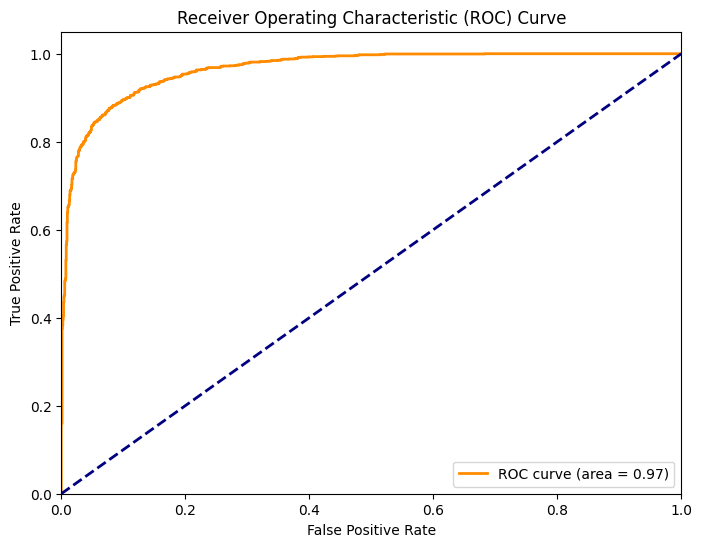

In [25]:
"""
Este código realiza la conversión de las etiquetas del conjunto de prueba y_test a valores binarios.
Si la etiqueta es 'Positive', se asigna el valor 1; de lo contrario, se asigna el valor 0. Esto se logra
mediante el uso de la expresión (y_test == 'Positive'), que devuelve una serie booleana con valores True
donde la etiqueta es 'Positive' y False en otro caso. Luego, se utiliza el método astype(int) para convertir
estos valores booleanos en enteros, donde True se convierte en 1 y False se convierte en 0.

"""
y_test_binary = (y_test == 'Positive').astype(int)


"""
Este código calcula la curva ROC (Receiver Operating Characteristic) y el área bajo la curva (AUC) utilizando las
probabilidades de clase predichas por el modelo. Para esto:

best_rf_model.predict_proba(X_test_tfidf): Utiliza el mejor modelo encontrado (best_rf_model) para predecir las
probabilidades de clase en lugar de las etiquetas de clase. predict_proba devuelve un array donde cada fila corresponde
a una instancia y las columnas corresponden a las probabilidades de pertenecer a cada clase.

roc_curve(y_test_binary, y_prob_best[:, 1]): Calcula la curva ROC utilizando las etiquetas binarias de prueba
(y_test_binary) y las probabilidades predichas de la clase positiva (y_prob_best[:, 1]). roc_curve devuelve las tasas
de verdaderos positivos (TPR) y las tasas de falsos positivos (FPR) para varios umbrales de clasificación.

auc(fpr, tpr): Calcula el área bajo la curva ROC (AUC) utilizando las tasas de FPR y TPR calculadas anteriormente.

Finalmente, se crea una figura con plt.figure, y se dibuja la curva ROC utilizando plt.plot. Se incluye una línea
de referencia para una clasificación aleatoria ([0, 1], [0, 1]) y se establecen etiquetas y títulos para la figura.
La leyenda se coloca en la esquina inferior derecha (loc="lower right") y se muestra la figura con plt.show().

"""
y_prob_best = best_rf_model.predict_proba(X_test_tfidf)
fpr, tpr, _ = roc_curve(y_test_binary, y_prob_best[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


La gráfica que aparece arriba de este texto es la Curva ROC (Receiver Operating Characteristic), una representación visual del rendimiento de un modelo de clasificación binaria en diferentes umbrales de discriminación.  

Eje X (False Positive Rate): Este eje muestra la tasa de falsos positivos, que es la proporción de instancias negativas incorrectamente clasificadas como positivas. Va de 0 a 1.

Eje Y (True Positive Rate): Este eje muestra la tasa de verdaderos positivos, que es la proporción de instancias positivas correctamente clasificadas como positivas. También se conoce como Sensibilidad o Recall. Va de 0 a 1.

Línea Diagonal (Línea Aleatoria): La línea diagonal representa el rendimiento de un clasificador aleatorio, donde la tasa de verdaderos positivos es igual a la tasa de falsos positivos. Los modelos que están por encima de esta línea se consideran mejores que las predicciones aleatorias.

Curva ROC: La curva ROC muestra cómo cambia la tasa de verdaderos positivos a medida que cambia la tasa de falsos positivos. Cuanto más alejada esté la curva de la línea diagonal hacia el punto (0,1), mejor será el rendimiento del modelo.

Área bajo la Curva (AUC): El área bajo la curva ROC (AUC) es una medida del rendimiento global del modelo. Cuanto mayor sea el AUC, mejor será el rendimiento del modelo. Un AUC de 0.5 sugiere que el modelo no es mejor que una elección aleatoria, mientras que un AUC de 1 indica un rendimiento perfecto.

A partir del gráfico podemos concluir:

Excelente rendimiento: Un AUC de 0.97 es muy cercano a 1, lo que sugiere que el modelo es capaz de distinguir entre las clases positivas y negativas con una alta precisión.

Buena capacidad de discriminación: Cuanto más cercano sea el AUC a 1, mejor será la capacidad del modelo para distinguir entre las clases. En este caso, un AUC de 0.97 sugiere que el modelo tiene una excelente capacidad de discriminación.

Poca proporción de errores: Un AUC alto indica que el modelo tiene una proporción muy baja de falsos positivos y falsos negativos en comparación con los verdaderos positivos y verdaderos negativos.

En síntesis, un AUC de 0.97 indica un rendimiento sobresaliente del modelo en la clasificación de muestras, lo que sugiere que es altamente confiable para predecir las clases correctas.












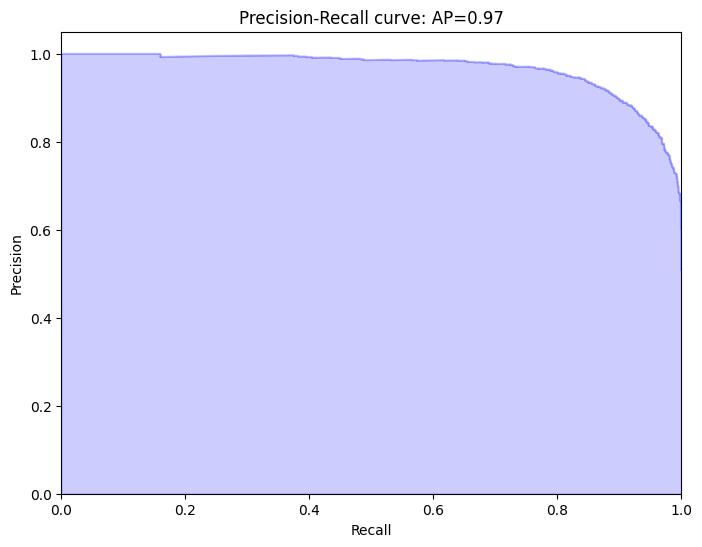

In [26]:
"""
Este código realiza la conversión de las etiquetas del conjunto de prueba y_test a valores binarios.
Si la etiqueta es 'Positive', se asigna el valor 1; de lo contrario, se asigna el valor 0. Esto se
logra mediante el uso de la expresión (y_test == 'Positive'), que devuelve una serie booleana con
valores True donde la etiqueta es 'Positive' y False en otro caso. Luego, se utiliza el método astype(int)
para convertir estos valores booleanos en enteros, donde True se convierte en 1 y False se convierte en 0.

"""
y_test_binary = (y_test == 'Positive').astype(int)

"""
Este código calcula la curva de precisión-recall utilizando las probabilidades de clase predichas por el modelo. Para esto:

precision_recall_curve(y_test_binary, y_prob_best[:, 1]): Calcula la precisión y el recall utilizando las etiquetas binarias
de prueba (y_test_binary) y las probabilidades predichas de la clase positiva (y_prob_best[:, 1]). precision_recall_curve
devuelve los valores de precisión y recall para varios umbrales de clasificación.

average_precision_score(y_test_binary, y_prob_best[:, 1]): Calcula el promedio de la precisión utilizando las etiquetas
binarias de prueba (y_test_binary) y las probabilidades predichas de la clase positiva (y_prob_best[:, 1]).
Esto proporciona un resumen único de la curva de precisión-recall mediante la integración de la precisión a lo largo
de todos los valores de recall.

Finalmente, se crea una figura con plt.figure, y se dibuja la curva de precisión-recall utilizando plt.step.
Se rellena el área bajo la curva utilizando plt.fill_between. Se establecen etiquetas y títulos para la figura,
y se muestra la figura con plt.show(). La leyenda se coloca en la esquina inferior derecha por defecto.

"""
precision, recall, _ = precision_recall_curve(y_test_binary, y_prob_best[:, 1])
average_precision = average_precision_score(y_test_binary, y_prob_best[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

La gráfica Precision-Recall nos muestra cómo varía la precisión del modelo a medida que cambia el nivel de recall (tasa de verdaderos positivos). Aquí hay algunas consideraciones para interpretar la gráfica, dado un valor de Average Precision (AP) de 0.97:

Curva suave y cerca del punto perfecto: Dado que el AP es alto (0.97), la curva Precision-Recall estará muy cerca del punto ideal (1.0 de precisión y recall). Esto indica que el modelo tiene una alta precisión incluso cuando se recupera la mayoría de las muestras positivas.

Buen equilibrio entre precisión y recall: Una curva Precision-Recall cerca del punto ideal sugiere que el modelo puede recuperar la mayoría de las muestras positivas (alto recall) mientras mantiene una alta precisión. En otras palabras, el modelo es capaz de identificar la mayoría de los casos positivos sin clasificar incorrectamente demasiados casos negativos.

Área bajo la curva (AP): El valor AP de 0.97 indica que el modelo tiene un excelente rendimiento en la clasificación de muestras positivas, con una alta precisión en comparación con el recall.

En síntesis, una gráfica Precision-Recall con un AP de 0.97 sugiere que el modelo tiene un excelente rendimiento en la clasificación de muestras positivas, con un buen equilibrio entre precisión y recall.

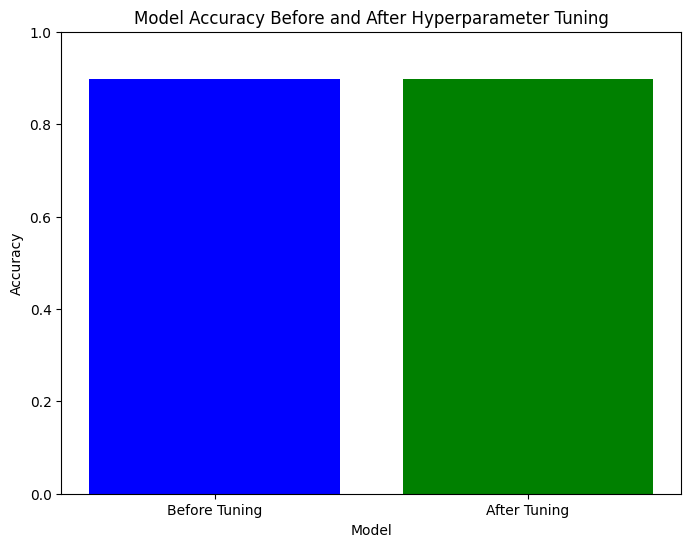

In [27]:
"""
Este código crea un gráfico de barras para comparar la precisión del modelo antes y después del ajuste de hiperparámetros.

accuracies: Se crea una lista que contiene la precisión del modelo antes y después del ajuste de hiperparámetros.
Estas precisiones se calculan utilizando la función accuracy_score del módulo sklearn.metrics. La precisión antes
del ajuste de hiperparámetros se calcula utilizando las predicciones y_pred del modelo original, mientras que la
precisión después del ajuste se calcula utilizando las predicciones y_pred_best del mejor modelo encontrado
por la búsqueda en cuadrícula.

labels: Se crea una lista que contiene las etiquetas para las barras del gráfico. Estas etiquetas indican si la
precisión corresponde al modelo antes o después del ajuste de hiperparámetros.

plt.figure(figsize=(8, 6)): Se crea una nueva figura de matplotlib con un tamaño de 8x6 pulgadas.

plt.bar(labels, accuracies, color=['blue', 'green']): Se dibuja el gráfico de barras. Las etiquetas
se utilizan en el eje x y las precisiones se utilizan en el eje y. Se especifica el color de las barras
como azul para el modelo antes del ajuste y verde para el modelo después del ajuste.

plt.xlabel('Model'): Se establece la etiqueta del eje x como 'Model'.

plt.ylabel('Accuracy'): Se establece la etiqueta del eje y como 'Accuracy'.

plt.title('Model Accuracy Before and After Hyperparameter Tuning'): Se establece el título del gráfico
como 'Model Accuracy Before and After Hyperparameter Tuning'.

plt.ylim([0.0, 1.0]): Se establece el rango del eje y de 0.0 a 1.0, ya que la precisión está en este rango.

plt.show(): Se muestra el gráfico de barras.

"""
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_best)]
labels = ['Before Tuning', 'After Tuning']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Before and After Hyperparameter Tuning')
plt.ylim([0.0, 1.0])
plt.show()


El gráfico muestra la precisión del modelo antes y después del ajuste de hiperparámetros.

Altura de las barras: Cada barra representa la precisión del modelo en un punto específico del tiempo: antes y después del ajuste de hiperparámetros. Si ambas barras están a la misma altura, significa que la precisión del modelo no ha cambiado significativamente después del ajuste de hiperparámetros. En otras palabras, el ajuste de hiperparámetros no ha tenido un impacto sustancial en la precisión del modelo.

Comparación de la precisión: Si las barras están a la misma altura, pero la precisión es alta (cerca de 1.0), esto podría indicar que el modelo ya estaba bien ajustado incluso antes del ajuste de hiperparámetros. Por otro lado, si la precisión es baja (cerca de 0.5), esto podría indicar que el modelo tiene dificultades para aprender del conjunto de datos independientemente de los hiperparámetros. En este caso como la precisión es alta, indicaría que el modelo ya estaba bien ajustado antes del ajuste de hiperparámetros.

Impacto del ajuste de hiperparámetros: Si las barras están a diferentes alturas, el ajuste de hiperparámetros ha tenido un impacto en la precisión del modelo. Una barra más alta después del ajuste indica una mejora en la precisión, mientras que una barra más baja indica una disminución en la precisión.

Dado que ambas barras están a la misma altura, esto puede indicar que el ajuste de hiperparámetros no ha mejorado la precisión del modelo.

Regresión Logística

In [28]:
"""
Este código se encarga de entrenar un modelo de Regresión Logística utilizando los datos de entrenamiento.

LogisticRegression(random_state=88): Aquí se crea una instancia de la clase LogisticRegression del módulo
sklearn.linear_model. Al instanciar este objeto, se están configurando varios parámetros del modelo. En este
caso, random_state se establece en 88 para garantizar la reproducibilidad de los resultados.

logistic_regression.fit(X_train_tfidf, y_train): Una vez que se ha creado la instancia del modelo, se utiliza
el método fit() para ajustar el modelo a los datos de entrenamiento. X_train_tfidf contiene las características
de entrenamiento vectorizadas mediante TF-IDF, mientras que y_train contiene las etiquetas de clase
correspondientes. Durante el ajuste, el modelo de regresión logística aprenderá los parámetros óptimos para hacer
predicciones basadas en las características proporcionadas.

Después de ejecutar estas líneas de código, el objeto logistic_regression contiene el modelo entrenado,
el cual puede ser utilizado para hacer predicciones sobre nuevos datos.

"""
logistic_regression = LogisticRegression(random_state=88)
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=88)

In [29]:
"""
y_pred_log: Esta es una variable que almacenará las predicciones del modelo de regresión logística
en el conjunto de datos de prueba.

logistic_regression: Es el modelo de regresión logística previamente entrenado que se utilizará
para realizar predicciones.

.predict(X_test_tfidf): Este método se utiliza para predecir las etiquetas de clase para los datos
de entrada proporcionados en X_test_tfidf, que son las características extraídas del conjunto de
datos de prueba utilizando la vectorización de texto (en este caso, TF-IDF).

En resumen, este código aplica el modelo de regresión logística previamente entrenado al conjunto
de datos de prueba para realizar predicciones sobre las etiquetas de clase. Las predicciones
resultantes se almacenan en la variable y_pred_log.

"""
y_pred_log = logistic_regression.predict(X_test_tfidf)

In [30]:
"""
print("Accuracy:", ...) : Esto imprime el mensaje "Accuracy:" en la consola, seguido del valor de la precisión del modelo.

accuracy_score(y_test, y_pred_log) : accuracy_score es una función de la biblioteca scikit-learn que se utiliza para calcular
la precisión de un modelo de clasificación. Toma como entrada dos conjuntos de etiquetas: y_test son las etiquetas reales del
conjunto de datos de prueba y y_pred_log son las etiquetas predichas por el modelo de regresión logística en el conjunto
de datos de prueba.

En resumen, este código imprime la precisión del modelo de regresión logística en el conjunto de datos de prueba. La
precisión es una medida que indica la proporción de predicciones correctas que realiza el modelo sobre el conjunto
de datos de prueba.

"""
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.890601390148081


El accuracy se calcula comparando las etiquetas predichas por el modelo de regresión logística (y_pred_log) con las etiquetas reales del conjunto de datos de prueba (y_test).

El resultado de Accuracy: 0.890601390148081 indica que el modelo de regresión logística clasificó correctamente aproximadamente el 89.06% de las muestras en el conjunto de datos de prueba. En otras palabras, el 89.06% de las veces, el modelo logró predecir correctamente la clase a la que pertenecen las muestras.

Es importante tener en cuenta que el accuracy por sí solo puede no ser suficiente para evaluar completamente el rendimiento de un modelo, especialmente en casos de conjuntos de datos desbalanceados o cuando las clases tienen diferentes costos de error. Por lo tanto, es recomendable complementar el análisis con otras métricas de evaluación, como la matriz de confusión, el informe de clasificación, la curva ROC, entre otras.








In [31]:
"""
print("Confusion Matrix:") : Esto imprime el encabezado "Confusion Matrix:" en la consola.

confusion_matrix(y_test, y_pred_log) : confusion_matrix es una función de la biblioteca scikit-learn
que calcula la matriz de confusión para evaluar el rendimiento de un modelo de clasificación. Toma
como entrada las etiquetas reales del conjunto de datos de prueba (y_test) y las etiquetas predichas
por el modelo (y_pred_log). La matriz de confusión es una tabla que muestra el número de verdaderos
positivos, verdaderos negativos, falsos positivos y falsos negativos del modelo.

En resumen, este código imprime la matriz de confusión del modelo de regresión logística en el conjunto
de datos de prueba. La matriz de confusión proporciona información detallada sobre el rendimiento del
modelo al clasificar las muestras en diferentes clases.

"""
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Confusion Matrix:
[[1488  138]
 [ 224 1459]]


El valor en la esquina superior izquierda (1488) indica el número de muestras clasificadas correctamente como negativas (clase 0) por el modelo.
El valor en la esquina superior derecha (138) indica el número de muestras que fueron incorrectamente clasificadas como positivas (falsos positivos).
El valor en la esquina inferior izquierda (224) indica el número de muestras que fueron incorrectamente clasificadas como negativas (falsos negativos).
El valor en la esquina inferior derecha (1459) indica el número de muestras clasificadas correctamente como positivas (clase 1) por el modelo.
En resumen, la matriz de confusión muestra cuántas muestras fueron correctamente o incorrectamente clasificadas por el modelo, lo que proporciona información útil sobre sus errores y aciertos.

In [32]:
"""
print("Classification Report:"): Esta línea imprime el encabezado "Classification Report:" en la consola.

classification_report(y_test, y_pred_log): classification_report es una función de la biblioteca scikit-learn
que genera un informe de clasificación para evaluar el rendimiento de un modelo de clasificación. Toma como
entrada las etiquetas reales del conjunto de datos de prueba (y_test) y las etiquetas predichas por el modelo
(y_pred_log). El informe de clasificación muestra la precisión, la recuperación, la puntuación F1 y otras
métricas para cada clase, así como el promedio ponderado y no ponderado de estas métricas para todas las clases.

En resumen, este código imprime un informe de clasificación del modelo de regresión logística en el conjunto de
datos de prueba. El informe proporciona métricas detalladas sobre el rendimiento del modelo en términos de precisión,
recuperación, puntuación F1 y otros para cada clase en el problema de clasificación.

"""
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.92      0.89      1626
    Positive       0.91      0.87      0.89      1683

    accuracy                           0.89      3309
   macro avg       0.89      0.89      0.89      3309
weighted avg       0.89      0.89      0.89      3309



Precision: La precisión se refiere a la proporción de instancias clasificadas como positivas que son realmente positivas. Para la clase negativa, la precisión es del 87%, lo que significa que el 87% de las instancias clasificadas como negativas son verdaderamente negativas. Para la clase positiva, la precisión es del 91%, lo que indica que el 91% de las instancias clasificadas como positivas son realmente positivas.

Recall (sensibilidad): El recall se refiere a la proporción de instancias positivas que se identifican correctamente. Para la clase negativa, el recall es del 92%, lo que significa que el 92% de todas las instancias negativas se identifican correctamente. Para la clase positiva, el recall es del 87%, lo que indica que el 87% de todas las instancias positivas se identifican correctamente.

F1-score: El F1-score es la media armónica de precision y recall. Es una medida que combina ambos aspectos del rendimiento del modelo en una sola métrica. Para ambas clases, el F1-score es del 89%, lo que sugiere un buen equilibrio entre precision y recall.

Exactitud (Accuracy): La exactitud del modelo es del 89%, lo que indica la proporción total de predicciones correctas sobre el número total de muestras en el conjunto de datos.

En general, el modelo de regresión logística parece tener un rendimiento bastante equilibrado para ambas clases, con métricas de precision, recall y F1-score bastante altas, así como una exactitud general del 89%.

Conclusiones

Para comparar los tres modelos de clasificación de reseñas de aplicaciones del Play Store (Random Forest sin GridSearchCV, Random Forest con GridSearchCV y Regresión Logística), podemos analizar las métricas de evaluación proporcionadas para cada uno:

Random Forest sin GridSearchCV:

Precisión (precision) para la clase negativa: 0.88
Precisión para la clase positiva: 0.92
Recall para la clase negativa: 0.92
Recall para la clase positiva: 0.87
Exactitud (Accuracy): 0.898
F1-score promedio ponderado: 0.90

Random Forest con GridSearchCV:

Precisión para la clase negativa: 0.88
Precisión para la clase positiva: 0.92
Recall para la clase negativa: 0.92
Recall para la clase positiva: 0.88
Exactitud (Accuracy): 0.898
F1-score promedio ponderado: 0.90

Regresión Logística:

Precisión para la clase negativa: 0.87
Precisión para la clase positiva: 0.91
Recall para la clase negativa: 0.92
Recall para la clase positiva: 0.87
Exactitud (Accuracy): 0.891
F1-score promedio ponderado: 0.89

Al comparar los tres modelos, observamos que tanto el modelo de Random Forest sin GridSearchCV como el modelo de Random Forest con GridSearchCV tienen métricas muy similares, con una ligera ventaja para el modelo sin GridSearchCV en términos de precisión para la clase positiva. Estos dos modelos tienen una precisión ligeramente mayor que el modelo de Regresión Logística.

Sin embargo, dado que todas las métricas son muy cercanas entre sí, no hay una diferencia significativa en términos de rendimiento entre los modelos. En general, los tres modelos muestran un buen desempeño en la clasificación de reseñas de aplicaciones del Play Store como positivas o negativas, con una exactitud que ronda el 89-90%.

Por lo tanto, la elección entre estos modelos puede depender de otros factores, como la facilidad de interpretación del modelo, el tiempo de entrenamiento y predicción, o la escalabilidad para conjuntos de datos más grandes.